
## Module 4

Build a dash app for a arborist studying the health of various tree species (as defined by the variable ‘spc_common’) across each borough (defined by the variable ‘borough’). This arborist would like to answer the following two questions for each species and in each borough.

Link to app.py: https://github.com/olga0503/DATA-608/blob/master/app.py


In [342]:
import pandas as pd
import numpy as np
import plotly.offline as py
import plotly.graph_objs as go
from plotly import tools

In [343]:
url = 'https://data.cityofnewyork.us/resource/nwxe-4ae8.json'
trees = pd.read_json(url)
trees.head(10)

,tree_id,block_id,created_at,tree_dbh,stump_diam,curb_loc,status,health,spc_latin,spc_common,...,boro_ct,state,latitude,longitude,x_sp,y_sp,council_district,census_tract,bin,bbl
0,180683,348711,2015-08-27,3,0,OnCurb,Alive,Fair,Acer rubrum,red maple,...,4073900,New York,40.723092,-73.844215,1.027431e+06,202756.7687,29.0,739.0,4052307.0,4.022210e+09
1,200540,315986,2015-09-03,21,0,OnCurb,Alive,Fair,Quercus palustris,pin oak,...,4097300,New York,40.794111,-73.818679,1.034456e+06,228644.8374,19.0,973.0,4101931.0,4.044750e+09
2,204026,218365,2015-09-05,3,0,OnCurb,Alive,Good,Gleditsia triacanthos var. inermis,honeylocust,...,3044900,New York,40.717581,-73.936608,1.001823e+06,200716.8913,34.0,449.0,3338310.0,3.028870e+09
3,204337,217969,2015-09-05,10,0,OnCurb,Alive,Good,Gleditsia triacanthos var. inermis,honeylocust,...,3044900,New York,40.713537,-73.934456,1.002420e+06,199244.2531,34.0,449.0,3338342.0,3.029250e+09
4,189565,223043,2015-08-30,21,0,OnCurb,Alive,Good,Tilia americana,American linden,...,3016500,New York,40.666778,-73.975979,9.909138e+05,182202.4260,39.0,165.0,3025654.0,3.010850e+09
5,190422,106099,2015-08-30,11,0,OnCurb,Alive,Good,Gleditsia triacanthos var. inermis,honeylocust,...,1014500,New York,40.770046,-73.984950,9.884187e+05,219825.5227,3.0,145.0,1076229.0,1.011310e+09
6,190426,106099,2015-08-30,11,0,OnCurb,Alive,Good,Gleditsia triacanthos var. inermis,honeylocust,...,1014500,New York,40.770210,-73.985338,9.883112e+05,219885.2785,3.0,145.0,1076229.0,1.011310e+09
7,208649,103940,2015-09-07,9,0,OnCurb,Alive,Good,Tilia americana,American linden,...,1012700,New York,40.762724,-73.987297,9.877691e+05,217157.8561,3.0,133.0,1086093.0,1.010410e+09
8,209610,407443,2015-09-08,6,0,OnCurb,Alive,Good,Gleditsia triacanthos var. inermis,honeylocust,...,5006400,New York,40.596579,-74.076255,9.630732e+05,156635.5542,NaN,NaN,NaN,NaN
9,192755,207508,2015-08-31,21,0,OffsetFromCurb,Alive,Fair,Platanus x acerifolia,London planetree,...,3037402,New York,40.586357,-73.969744,9.926537e+05,152903.6306,47.0,37402.0,3320727.0,3.072350e+09


## 1.What proportion of trees are in good, fair, or poor health according to the ‘health’   variable?

In [344]:
for x in range(0, max_row, offset):
    #print('x is ' + str(x))
    url_1 = ('https://data.cityofnewyork.us/resource/nwxe-4ae8.json?$limit=1000&$offset=' + str(x) +\
        '&$select=borocode,spc_common,health,steward,count(block_id)' +\
        '&$group=borocode,spc_common,health,steward').replace(' ', '%20')
    trees = pd.read_json(url_1)
    if(x==0):
        df = pd.DataFrame(columns=list(trees.columns.values))
    df = df.append(trees)

df = df.dropna(axis=0, how='any')



In [259]:
print(df)

    borocode      spc_common health steward count_block_id
0          1  American beech   Fair    1or2              3
1          1  American beech   Fair    None              1
2          1  American beech   Good    1or2              7
3          1  American beech   Good    None              8
4          1  American beech   Poor    None              3
..       ...             ...    ...     ...            ...
559        5      willow oak   Good    1or2             29
560        5      willow oak   Good    3or4              4
561        5      willow oak   Good    None            177
562        5      willow oak   Poor    1or2              2
563        5      willow oak   Poor    None              9

[2560 rows x 5 columns]


In [345]:
df.head(5)

,borocode,spc_common,health,steward,count_block_id
0,1,American beech,Fair,1or2,3
1,1,American beech,Fair,None,1
2,1,American beech,Good,1or2,7
3,1,American beech,Good,None,8
4,1,American beech,Poor,None,3


In [346]:
df_totals = df.groupby(['borocode', 'spc_common'])['count_block_id'].sum()
df_totals = df_totals.reset_index(drop=False)
df_totals.columns = ['borocode', 'spc_common', 'total_spc_common']

In [347]:

df_totals.head(5)

,borocode,spc_common,total_spc_common
0,1,'Schubert' chokecherry,163
1,1,American beech,22
2,1,American elm,1698
3,1,American hophornbeam,84
4,1,American hornbeam,85


In [348]:
df_total_by_borocode_specie_health = df.groupby(['borocode', 'spc_common', 'health'])['count_block_id'].sum()
df_total_by_borocode_specie_health = df_total_by_borocode_specie_health.reset_index(drop=False)
df_total_by_borocode_specie_health.columns = ['borocode', 'spc_common', 'health', 'total']

In [349]:
df_total_by_borocode_specie_health.head(5)

,borocode,spc_common,health,total
0,1,'Schubert' chokecherry,Fair,40
1,1,'Schubert' chokecherry,Good,111
2,1,'Schubert' chokecherry,Poor,12
3,1,American beech,Fair,4
4,1,American beech,Good,15


In [350]:
tree_ratio = pd.merge(df_total_by_borocode_specie_health, df_totals, on=['borocode', 'spc_common'])

In [351]:
tree_ratio.head(5)

,borocode,spc_common,health,total,total_spc_common
0,1,'Schubert' chokecherry,Fair,40,163
1,1,'Schubert' chokecherry,Good,111,163
2,1,'Schubert' chokecherry,Poor,12,163
3,1,American beech,Fair,4,22
4,1,American beech,Good,15,22


In [352]:
tree_ratio['ratio'] = tree_ratio['total']/ tree_ratio['total_spc_common']
tree_ratio.head(10)

,borocode,spc_common,health,total,total_spc_common,ratio
0,1,'Schubert' chokecherry,Fair,40,163,0.245399
1,1,'Schubert' chokecherry,Good,111,163,0.680982
2,1,'Schubert' chokecherry,Poor,12,163,0.073620
3,1,American beech,Fair,4,22,0.181818
4,1,American beech,Good,15,22,0.681818
5,1,American beech,Poor,3,22,0.136364
6,1,American elm,Fair,259,1698,0.152532
7,1,American elm,Good,1361,1698,0.801531
8,1,American elm,Poor,78,1698,0.045936
9,1,American hophornbeam,Fair,12,84,0.142857


In [353]:
df_health = tree_proportions.groupby(['health'])['total'].sum()
df_health = df_health.reset_index(drop=False)
df_health.head()

,health,total
0,Fair,49266
1,Good,264861
2,Poor,13339


In [354]:
df_health1 = tree_proportions.groupby(['health'])['total_for_specie_in_borough'].sum()
df_health1 = df_health1.reset_index(drop=False)
df_health1.head()

,health,total_for_specie_in_borough
0,Fair,326937
1,Good,327457
2,Poor,326652


In [274]:
tot_health = pd.merge(df_health, df_health1, on=['health'])
tot_health.head()

,health,total,total_for_specie_in_borough
0,Fair,49266,326937
1,Good,264861,327457
2,Poor,13339,326652


In [355]:
tot_health['ratio'] = tot_health['total']/ tot_health['total_for_specie_in_borough']
tot_health.head(10)

,health,total,total_for_specie_in_borough,ratio
0,Fair,49266,326937,0.150690
1,Good,264861,327457,0.808842
2,Poor,13339,326652,0.040836


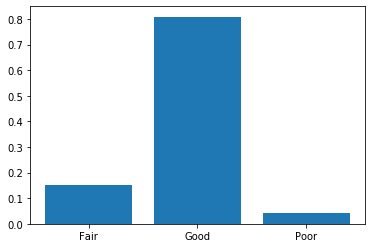

In [356]:
import matplotlib.pyplot as plt
import numpy as np

x = tot_health['health']
y = tot_health['ratio']

plt.bar(x,y)
plt.show()

## 2. Are stewards (steward activity measured by the ‘steward’ variable) having an impact on the health of trees?

In [357]:
list(df['steward'].unique())

['1or2', 'None', '3or4', '4orMore']

In [358]:
df.head()

,borocode,spc_common,health,steward,count_block_id
0,1,American beech,Fair,1or2,3
1,1,American beech,Fair,None,1
2,1,American beech,Good,1or2,7
3,1,American beech,Good,None,8
4,1,American beech,Poor,None,3


In [359]:
df_total_by_steward = df.groupby(['borocode', 'spc_common', 'steward'])['count_block_id'].sum()
df_total_by_steward = df_total_by_steward.reset_index(drop=False)
df_total_by_steward.columns = ['borocode', 'spc_common', 'steward', 'steward_total']
df_total_by_steward.head(10)

,borocode,spc_common,steward,steward_total
0,1,'Schubert' chokecherry,1or2,90
1,1,'Schubert' chokecherry,3or4,23
2,1,'Schubert' chokecherry,4orMore,3
3,1,'Schubert' chokecherry,None,47
4,1,American beech,1or2,10
5,1,American beech,None,12
6,1,American elm,1or2,495
7,1,American elm,3or4,102
8,1,American elm,4orMore,15
9,1,American elm,None,1086


In [360]:


df_steward = pd.merge(df, df_total_by_steward, on=['borocode', 'spc_common', 'steward'])
df_steward.head(10)



,borocode,spc_common,health,steward,count_block_id,steward_total
0,1,American beech,Fair,1or2,3,10
1,1,American beech,Good,1or2,7,10
2,1,American beech,Fair,None,1,12
3,1,American beech,Good,None,8,12
4,1,American beech,Poor,None,3,12
5,1,American elm,Fair,1or2,85,495
6,1,American elm,Good,1or2,380,495
7,1,American elm,Poor,1or2,30,495
8,1,American elm,Fair,3or4,22,102
9,1,American elm,Good,3or4,75,102


In [361]:
df_steward['health_index'] = df_steward['steward_total']/ df_steward['count_block_id']
df_steward.head(10)

,borocode,spc_common,health,steward,count_block_id,steward_total,health_index
0,1,American beech,Fair,1or2,3,10,3.33333
1,1,American beech,Good,1or2,7,10,1.42857
2,1,American beech,Fair,None,1,12,12
3,1,American beech,Good,None,8,12,1.5
4,1,American beech,Poor,None,3,12,4
5,1,American elm,Fair,1or2,85,495,5.82353
6,1,American elm,Good,1or2,380,495,1.30263
7,1,American elm,Poor,1or2,30,495,16.5
8,1,American elm,Fair,3or4,22,102,4.63636
9,1,American elm,Good,3or4,75,102,1.36


In [362]:
df_steward_1 = df_steward.groupby(['health', 'steward'])['health_index'].sum()
df_steward_1 = df_steward_1.reset_index(drop=False)
df_steward_1.columns = ['health', 'steward', 'health_index']
df_steward_1.head(10)

,health,steward,health_index
0,Fair,1or2,1917.961915
1,Fair,3or4,1208.618829
2,Fair,4orMore,329.674087
3,Fair,None,2205.863067
4,Good,1or2,471.320311
5,Good,3or4,338.996357
6,Good,4orMore,142.578105
7,Good,None,494.691208
8,Poor,1or2,5393.528820
9,Poor,3or4,2681.237555


In [363]:
groups = df_steward_1.groupby('health' )
fig = go.Figure()
for g in groups.groups:
    group = groups.get_group(g)
    fig.add_trace(go.Bar(x=group['steward'], y=group['health_index'], name=str(g)))
fig.layout.update({'height':600})
fig.layout.update({'width':1500})
fig.show()